In [23]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
from labfiles.lab_utils_common import dlc
from labfiles.lab_neurons_utils import plt_prob_1d, sigmoidnp, plt_linear, plt_logistic
plt.style.use(r'labfiles/deeplearning.mplstyle')

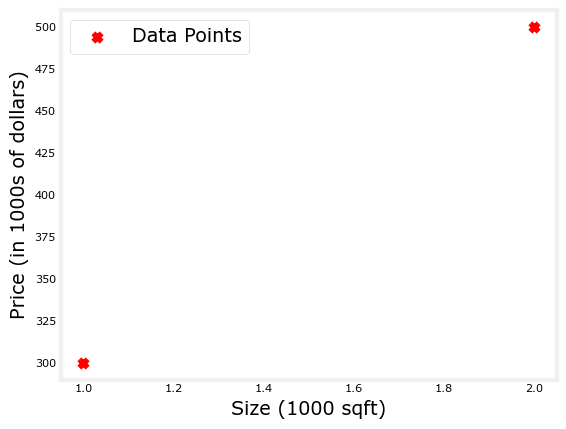

In [24]:
# neurons without activation (linear regression)
X_train = np.array([[1.0], [2.0]], dtype=np.float32)           #(size in 1000 square feet)
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)       #(price in 1000s of dollars)

fig, ax = plt.subplots(1,1)
ax.scatter(X_train, Y_train, marker='x', c='r', label="Data Points")
ax.legend( fontsize='xx-large')
ax.set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
ax.set_xlabel('Size (1000 sqft)', fontsize='xx-large')
plt.show()

In [25]:
# getting a linear unit from tensorflow
linear_layer = tf.keras.layers.Dense(units=1, activation = 'linear')

# passing a single value through the linear unit
a1 = linear_layer(X_train[0].reshape(1,1)) # reshape into a 2-d array as expected by the layer in tensorflow
print(a1)

tf.Tensor([[-0.59]], shape=(1, 1), dtype=float32)


In [28]:
# passing of data to the unit has triggered it to initialize its weights and biases
w, b= linear_layer.get_weights()
print(f"parameters before: w = {w}, b={b}")

# the weights are set to random values we can set them to custom values
# set_weights takes a list of numpy arrays
linear_layer.set_weights([np.array([[200]]), np.array([100])])
print(f"parameters after: {linear_layer.get_weights()}")

parameters before: w = [[200.]], b=[100.]
parameters after: [array([[200.]], dtype=float32), array([100.], dtype=float32)]


In [29]:
# making predictions on the set parameters
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)


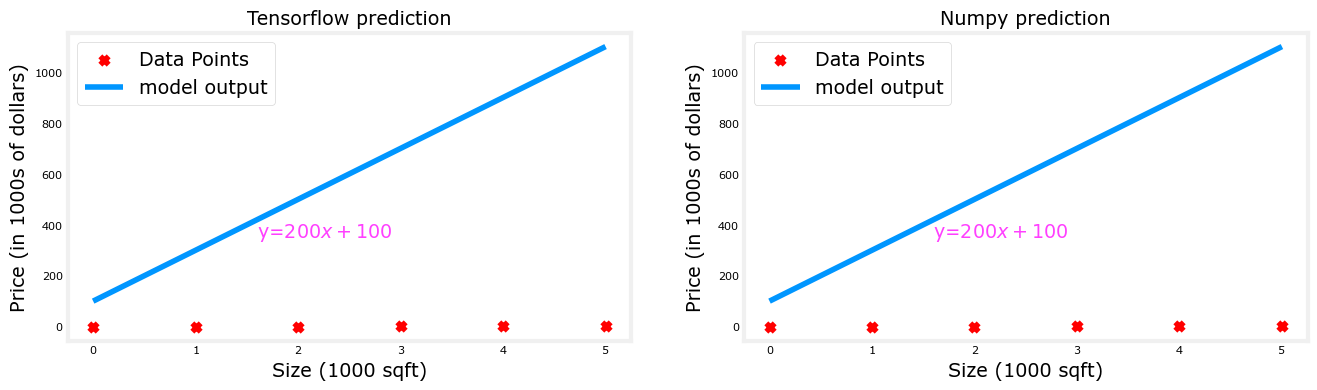

In [35]:
# plotting the predictions, comparing TF and numpy
prediction_tf = linear_layer(X_train)
prediction_np = np.dot( X_train, np.array([[200]])) + np.array([100])

plt_linear(X_train, Y_train, prediction_tf, prediction_np)

In [36]:
# neurons with activation (logistic regression)
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix

# labels
pos = Y_train == 1
neg = Y_train == 0
X_train[pos]

array([3., 4., 5.], dtype=float32)

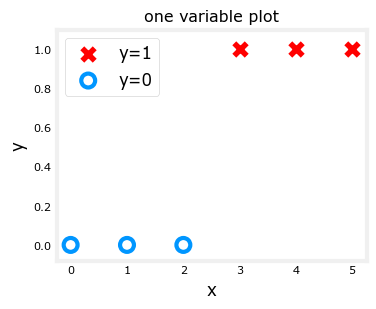

In [37]:
# plotting data
pos = Y_train == 1
neg = Y_train == 0

fig,ax = plt.subplots(1,1,figsize=(4,3))
ax.scatter(X_train[pos], Y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0", facecolors='none', 
              edgecolors=dlc["dlblue"],lw=3)

ax.set_ylim(-0.08,1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('one variable plot')
ax.legend(fontsize=12)
plt.show()

In [43]:
# creating a single layer logistic neuron with sigmoid activation
model = Sequential(
    [
        tf.keras.layers.Dense(1, input_dim=1,  activation = 'sigmoid', name='L1')
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [44]:
# printing initialized paarmeters
logistic_layer = model.get_layer('L1')
w,b = logistic_layer.get_weights()
print(f"Initialized parameters: w={w}, b={b} with shape {w.shape} and {b.shape}")

# setting parameters
set_w = np.array([[2]])
set_b = np.array([-4.5])
# set_weights takes a list of numpy arrays
logistic_layer.set_weights([set_w, set_b])
print(f"set parameters: {logistic_layer.get_weights()}")

Initialized parameters: w=[[-1.65]], b=[0.] with shape (1, 1) and (1,)
set parameters: [array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


1/1 [==============================] - 0s 29ms/step
[[0.01]]
[[0.01]]
1/1 [==============================] - 0s 27ms/step


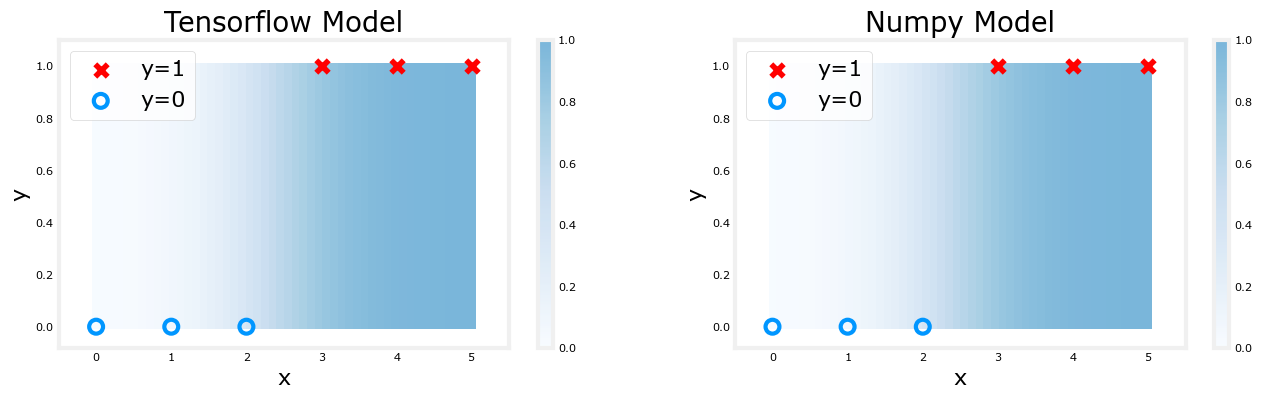

In [47]:
# comparing predictions from tensorflow and numpy
a1 = model.predict(X_train[0].reshape(1,1))
print(a1)
alog = sigmoidnp(np.dot(set_w,X_train[0].reshape(1,1)) + set_b)
print(alog)

# plotting predictions
plt_logistic(X_train, Y_train, model, set_w, set_b, pos, neg)